In [1]:
from citrination_client import CitrinationClient

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from saxskit.saxs_math import profile_spectrum
from saxskit.saxs_citrination import CitrinationSaxsClassifer

## Predict populations and scattering parameters from measured data

#### Step 1. Read q (1/A) and Intensity from csv file

In [3]:
q_I = np.genfromtxt ('sample_0.csv', delimiter=",")

#### Step 2. Examine the spectrum

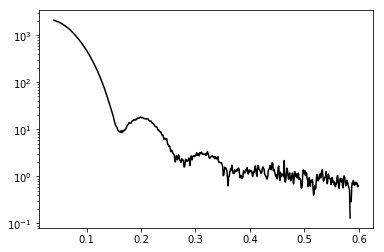

In [4]:
plt.semilogy(q_I[:,0],q_I[:,1],'-k')
plt.show()

#### Step 3. Calculate numerical features (profile) of the spectrum

In [5]:
features = profile_spectrum(q_I)
features

OrderedDict([('Imax_over_Imean', 13.181053776872366),
             ('Imax_sharpness', 1.0200591262893703),
             ('I_fluctuation', 0.0010389964263103481),
             ('logI_fluctuation', 5.9430730571972088),
             ('logI_max_over_std', 3.2213864774189336),
             ('r_fftIcentroid', 0.10056978331899331),
             ('r_fftImax', 0.0017857142857142857),
             ('q_Icentroid', 0.071982047474586974),
             ('q_logIcentroid', 0.13005159629922175),
             ('pearson_q', -0.55991024447800586),
             ('pearson_q2', -0.41978848602666091),
             ('pearson_expq', -0.51884676634956572),
             ('pearson_invexpq', 0.60128004622986864)])

#### Step 4. Create SaxsCitrination using Citrination credentials

In [6]:
m = CitrinationSaxsClassifer('https://slac.citrination.com',"../../citrination_api_key_ssrl.txt")

#### Step 5.  Predict scatterer populations

In [7]:
result = m.citrination_classify(features)
result

OrderedDict([('unidentified', ['0', 0.007825454281763955]),
             ('guinier_porod', ['0', 0.05050983018934078]),
             ('spherical_normal', ['1', 0.008604491365074463]),
             ('diffraction_peaks', ['0', 0.006164954858187079])])

#### Step 5. Predict scattering parameters

In [9]:
result2 = m.citrination_predict(result, features, q_I)
result2

OrderedDict([('I0_floor', None),
             ('G_gp', None),
             ('rg_gp', None),
             ('D_gp', None),
             ('I0_sphere', None),
             ('r0_sphere', [27.928580936639083, 0.7889737778699067]),
             ('sigma_sphere', [0.09907383296227086, 0.09215120039782715]),
             ('I_pkcenter', None),
             ('q_pkcenter', None),
             ('pk_hwhm', None)])